# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically

%matplotlib inline

In [3]:
path = 'C:\\Users\\Marce\\careerfoundry\\food'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged.pkl'))

In [5]:
df.columns

Index(['adm0_id', 'Country', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource',
       'Time',
       'Total alcohol consumption per capita, male (liters of pure alcohol)',
       'Taxes on goods and services', 'Tax payments',
       'Secondary education, pupils', 'Rural population (%)',
       'Revenue, excluding grants (% of GDP)',
       'Poverty headcount ratio at national poverty lines (% of population) ',
       'Number of under-five deaths ',
       'Multidimensional poverty index (scale 0-1)',
       'Mortality rate, infant (per 1,000 live births)',
       'Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)',
       '_merge', 'Price category'],
      dtype='object')

In [6]:
df2 = df[['Country','Time',
       'Taxes on goods and services', 'Tax payments','Rural population (%)',
       'Revenue, excluding grants (% of GDP)',
       'Number of under-five deaths ',
       'Mortality rate, infant (per 1,000 live births)']]

In [7]:
df2.head(5)

,Country,Time,Taxes on goods and services,Tax payments,Rural population (%),"Revenue, excluding grants (% of GDP)",Number of under-five deaths,"Mortality rate, infant (per 1,000 live births)"
0,Afghanistan,2016.0,4.473712e+10,19.0,74.980,12.678010,79915.0,51.3
1,Afghanistan,2017.0,5.318862e+10,19.0,74.750,13.039262,77124.0,49.6
2,Afghanistan,2018.0,NaN,19.0,74.505,NaN,74595.0,48.0
3,Afghanistan,2019.0,NaN,19.0,74.246,NaN,72186.0,46.5
4,Afghanistan,2020.0,NaN,NaN,73.974,NaN,NaN,NaN


In [8]:
df2.shape

(4880275, 8)

In [9]:
df2.rename(columns={'Taxes on goods and services':'Taxes','Revenue, excluding grants (% of GDP)':'Revenue','Mortality rate, infant (per 1,000 live births)':'infantmortality'},inplace=True)

C:\Users\Marce\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
df2.isnull().sum()

Country                               0
Time                                  0
Taxes                           1887093
Tax payments                    1049831
Rural population (%)                500
Revenue                         1887093
Number of under-five deaths      976055
infantmortality                  976055
dtype: int64

In [11]:
df2.describe()

,Time,Taxes,Tax payments,Rural population (%),Revenue,Number of under-five deaths,infantmortality
count,4.880275e+06,2.993182e+06,3.830444e+06,4.879775e+06,2.993182e+06,3.904220e+06,3.904220e+06
mean,2.018000e+03,6.623914e+13,3.015473e+01,5.835939e+01,1.820095e+01,9.114501e+04,3.837104e+01
std,1.414214e+00,1.919896e+14,1.387346e+01,2.090123e+01,6.304101e+00,1.893896e+05,1.914211e+01
min,2.016000e+03,2.495992e+07,6.000000e+00,9.908000e+00,1.369620e-04,3.600000e+02,2.400000e+00
25%,2.017000e+03,8.478481e+10,1.900000e+01,4.467500e+01,1.420535e+01,1.372400e+04,2.390000e+01
50%,2.018000e+03,6.150000e+11,3.100000e+01,5.702400e+01,1.919469e+01,2.880100e+04,3.540000e+01
75%,2.019000e+03,2.940000e+12,4.200000e+01,7.969000e+01,2.072523e+01,7.648100e+04,5.190000e+01
max,2.020000e+03,7.050000e+14,5.900000e+01,8.761200e+01,4.281407e+01,8.778380e+05,8.040000e+01


In [12]:
dups = df2.duplicated()

In [13]:
# no dups

dups.shape

(4880275,)

C:\Users\Marce\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mp_price', ylabel='Density'>

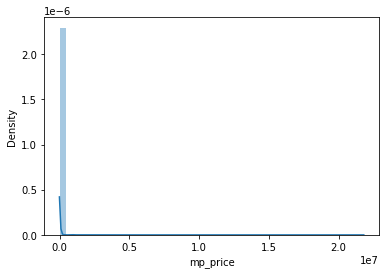

In [14]:
sns.distplot(df['mp_price'], bins=50) # Shows extreme values

In [15]:
# check mean

df['mp_price'].mean()

8405.5164656542

In [16]:
# check median

df['mp_price'].median() # Check the median

400.0

In [17]:
# check max

df['mp_price'].max() # Check the max

21777780.0

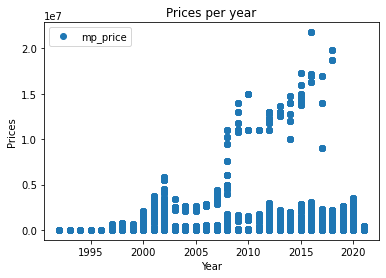

In [18]:
df.plot (x="mp_year", y="mp_price", style="o")
plt.title("Prices per year")
plt.xlabel("Year")
plt.ylabel("Prices")
plt.show()

# Hypothesis = Increasing years have a positive effect on prices.

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['mp_year'].values.reshape(-1,1)
y = df['mp_price'].values.reshape(-1,1)

In [20]:
X

array([[2014],
       [2014],
       [2014],
       ...,
       [2021],
       [2021],
       [2021]], dtype=int64)

In [21]:
y

array([[  50.],
       [  50.],
       [  50.],
       ...,
       [1200.],
       [1200.],
       [1200.]])

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
# create a regression object

regression = LinearRegression()

In [24]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

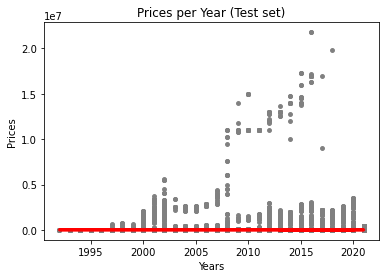

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color="gray", s = 15)
plot_test.plot(X_test, y_predicted, color = "red", linewidth = 3)
plot_test.title("Prices per Year (Test set)")
plot_test.xlabel("Years")
plot_test.ylabel("Prices")
plt.savefig('regression.png')
plot_test.show()

## the line doesn't fit the data

In [27]:
# create objects with model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [28]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-98.30850791]]
Mean squared error:  21859032620.14716
R2 score:  2.215642297298537e-06


In [29]:
y_predicted

array([[8050.62449309],
       [8345.55001683],
       [8050.62449309],
       ...,
       [8050.62449309],
       [8542.16703265],
       [8738.78404848]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,550.0000,8050.624493
1,41854.8387,8345.550017
2,1500.0000,8050.624493
3,300.0000,7952.315985
4,675.0000,8542.167033
5,800.0000,8640.475541
6,12000.0000,8148.933001
7,270.0000,9033.709572
8,716.7500,8542.167033
9,2100.0000,8050.624493


## the model performed badly on the test set. bias is unlikely, but my mistake (which I realized now), probably was not to unify the different currencies